# Exercise 9

1. Using the dataset in EFIplus_medit.zip run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df.head())

    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
0  ES_01_0002  38.102003  -4.096070   Spain   Guadalquivir       0          1   
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius malacitanus  \
0                0              1             0  ...                     0   
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3                1              1             1  ...                     0   
4                1              1             1  ...                     0   

   Squalius pyrenaicus  Squalius torgalensis

In [19]:
df_filtered = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]
print(df_filtered.head())

    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   
5  ES_02_0005  40.732830  -2.078003   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius malacitanus  \
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3                1              1             1  ...                     0   
4                1              1             1  ...                     0   
5                1              1             1  ...                     0   

   Squalius pyrenaicus  Squalius torgalensis

In [20]:
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = df_filtered[quant_vars].dropna()

linkage_methods = ['ward', 'complete', 'average', 'single']
cluster_labels = {}

for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(X)
    cluster_labels[method] = labels
    print(f"Linkage: {method}, Cluster counts: {np.bincount(labels)}")

for method in linkage_methods:
    df_filtered.loc[X.index, f'cluster_{method}'] = cluster_labels[method]

Linkage: ward, Cluster counts: [457 313 118]
Linkage: complete, Cluster counts: [721 141  26]
Linkage: average, Cluster counts: [800  86   2]
Linkage: single, Cluster counts: [885   2   1]


C:\Users\dias3\AppData\Local\Temp\ipykernel_14916\1526777018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[X.index, f'cluster_{method}'] = cluster_labels[method]
C:\Users\dias3\AppData\Local\Temp\ipykernel_14916\1526777018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[X.index, f'cluster_{method}'] = cluster_labels[method]
C:\Users\dias3\AppData\Local\Temp\ipykernel_14916\1526777018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

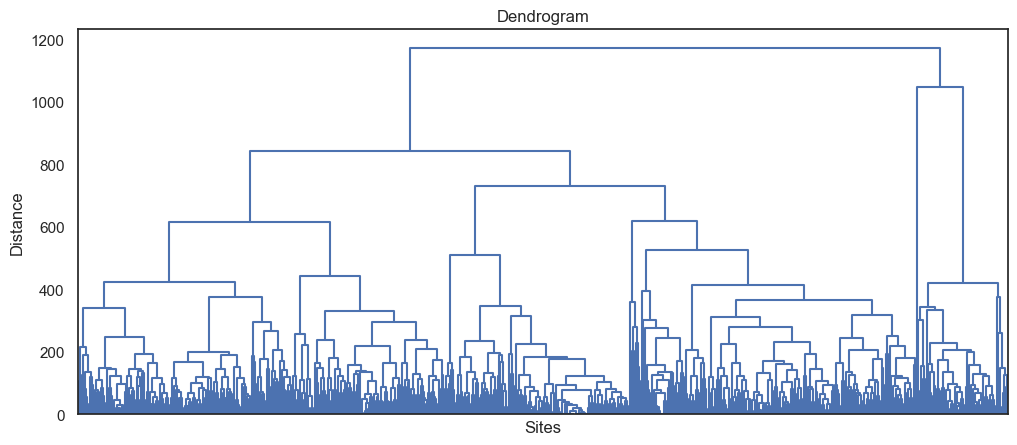

In [21]:
Z = linkage(X, method='average')

plt.figure(figsize=(12, 5))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Sites')
plt.ylabel('Distance')
plt.show()

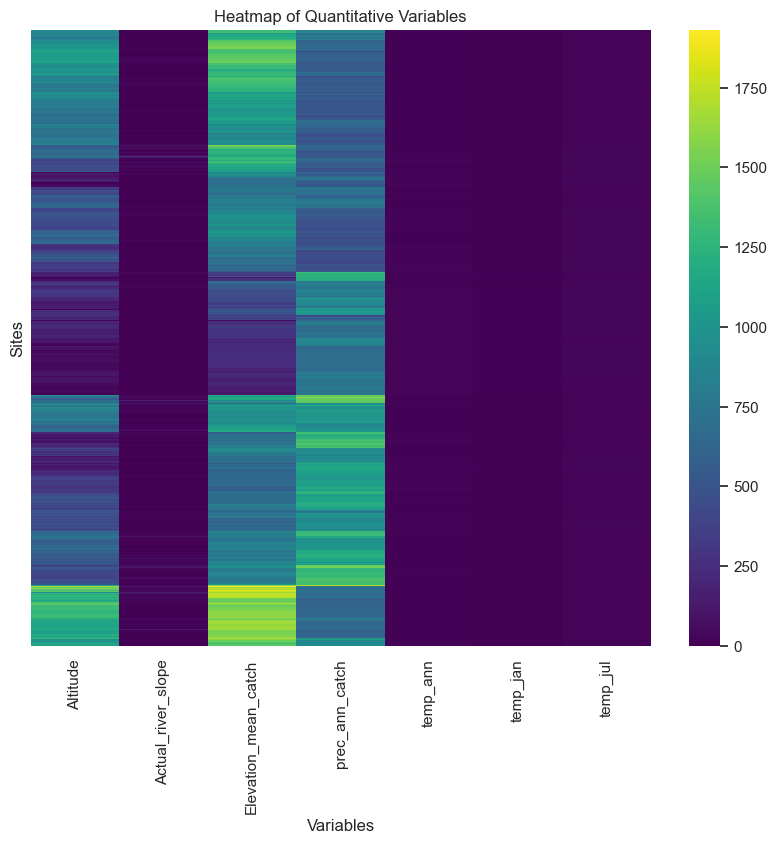

In [22]:
sns.set(style='white')
dendro = dendrogram(Z, no_plot=True)
row_order = dendro['leaves']

plt.figure(figsize=(10, 8))
sns.heatmap(X.iloc[row_order], cmap='viridis', yticklabels=False)
plt.title('Heatmap of Quantitative Variables')
plt.xlabel('Variables')
plt.ylabel('Sites')
plt.show()

3. Plot a dendrogram that clusters the environmental variables instead (columns) using average
linkage – discuss how this would help to select variables for e.g. a regression-based analysis.

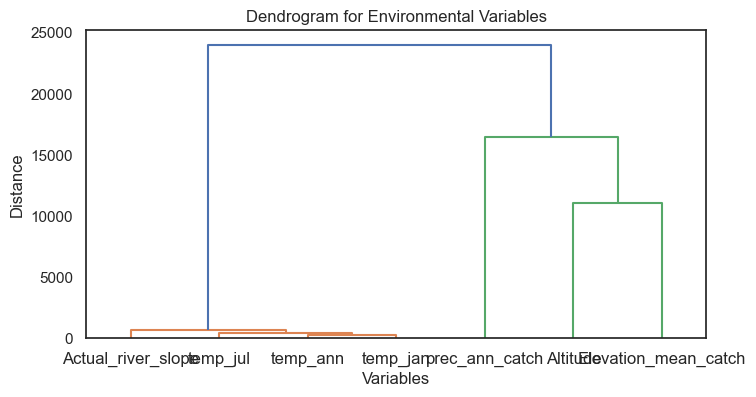

In [23]:
Z_cols = linkage(X.T, method='average')

plt.figure(figsize=(8, 4))
dendrogram(Z_cols, labels=quant_vars)
plt.title('Dendrogram for Environmental Variables')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

The dendrogram groups variables based on the similarity of the information they convey. Variables in the same cluster are very similar, so for a regression-based analysis, we should select only a few representative variables from each cluster. This creates a more parsimonious model with fewer, non-redundant features.